### Problem Statement:

BoomBikes, a leading bike-sharing provider in the United States, has experienced significant revenue declines amidst the ongoing COVID-19 pandemic. Negotiating the challenging market conditions, the company is strategizing to regain momentum once the lockdown restrictions are lifted, and economic activities rebound.

With a keen focus on reviving revenue streams, BoomBikes aims to develop a comprehensive business strategy. This involves:

1. Assessing post-quarantine demand for shared bikes nationwide by crafting a linear model.
2. Identifying key variables influencing revenue generation, particularly those pivotal in predicting shared bike demand.
3. Evaluating the model's accuracy in depicting the fluctuations in bike demand based on identified variables.

This proactive approach is geared towards positioning BoomBikes to swiftly respond to increased demand post-pandemic, thereby distinguishing itself in the market and maximizing profitability.

In [547]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import calendar

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Data Loading

Loading the data into the data frame

In [548]:
bikeshare_df=pd.read_csv("day.csv")

## Data Cleaning

Check whether there is any headers/footers or summery details rows. If they are present, we need to delete them. 

In [549]:
bikeshare_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [550]:
#Check whether there is any footers or summery details rows
bikeshare_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [551]:
bikeshare_df.shape

(730, 16)

In [552]:
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### There are several columns which are single valued. 
- They cannot contribute to our analysis in any way. So removing them.

In [553]:
bikeshare_df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

## Check duplicate rows

This is often a handy thing to do because a huge data might have some duplicate rows which might be disturbing analysis. If dataset contains the duplicate rows, we need to drop them. 

In [554]:
# Check if there is any duplicate rows
duplicate_rows = len(bikeshare_df[bikeshare_df.duplicated()])
print(f'duplicate rows count = {duplicate_rows}')

duplicate rows count = 0


## Checking the Missing Values

In [555]:
# check missing values in each column
round(100*bikeshare_df.isnull().mean(), 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [556]:
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Removing unwanted columns

Based on understanding the dataset, the following variables may not be useful for further analysis:

- `instant`: This is only an index value, and we already have a default index serving the same purpose.

- `dteday`: This column contains dates. Since we already have separate columns for 'year' and 'month', we can proceed with our analysis without including this column.

- `casual` and `registered`: Both of these columns contain the count of bike bookings by different categories of customers. Since our objective is to find the total count of bikes rather than specific categories. So, we will ignore these two columns.

In [557]:
bikeshare_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True) 

## Check unique values in each column

Based on the count, we can determine whether the variables come under Categorial or Numerical. 

In [558]:
bikeshare_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [559]:
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

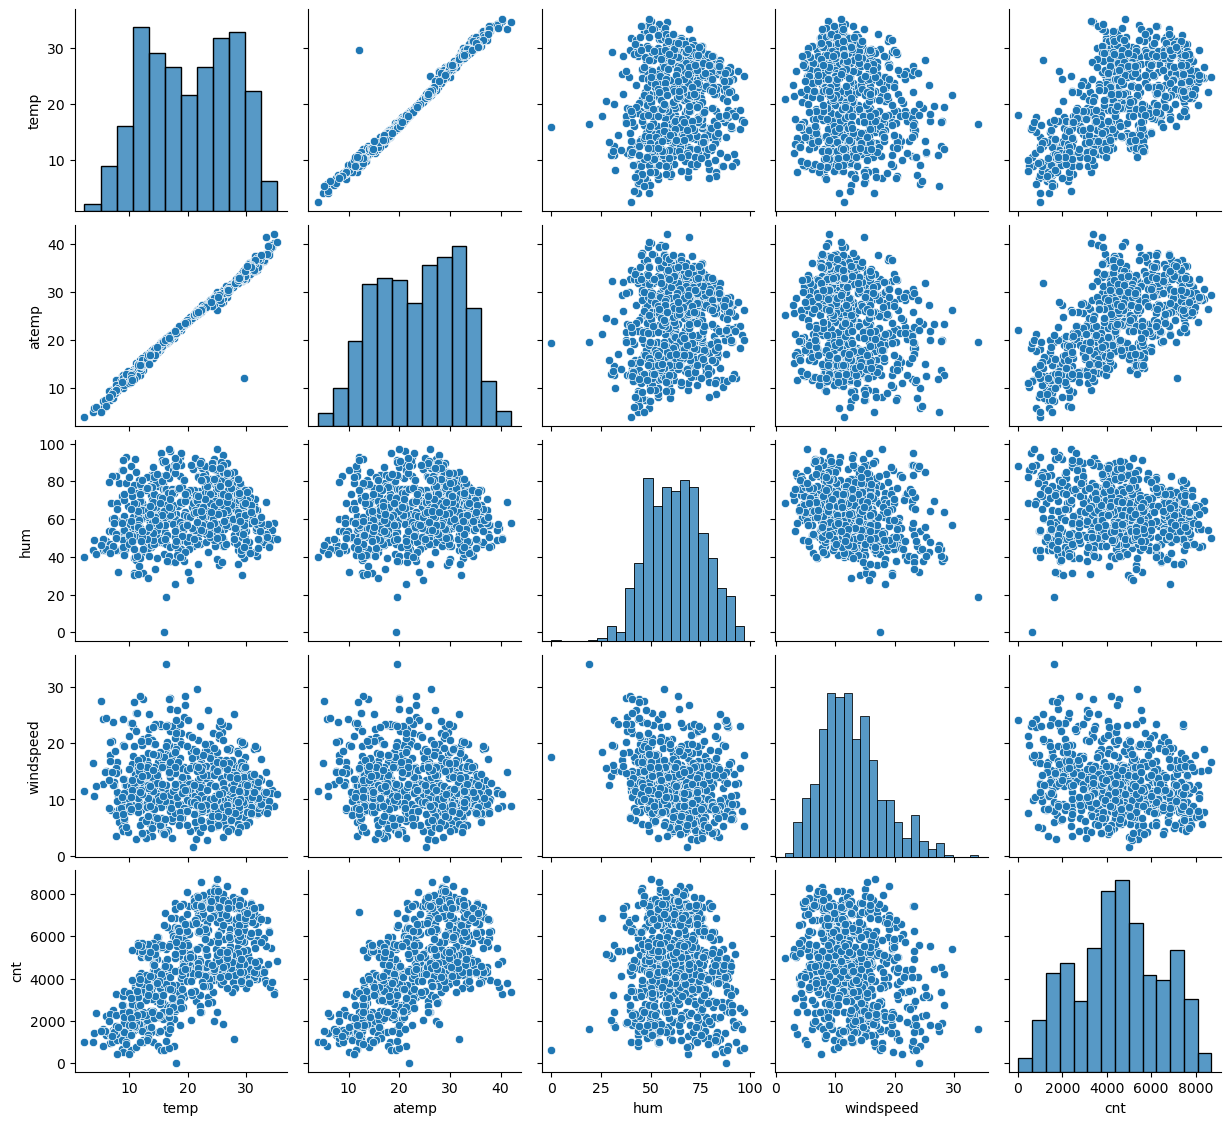

In [560]:
sns.pairplot(bikeshare_df[numerical_cols])  # Adjust height as per your preference
plt.subplots_adjust(top=0.9) 
plt.show()


#### Observation:
By visualising the numeric variables, it appears that a linear model might be appropriate in this case. There are some positive correlation observed between certain independent variables such as `temp` and `atemp` with the target variable `cnt`.  

### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

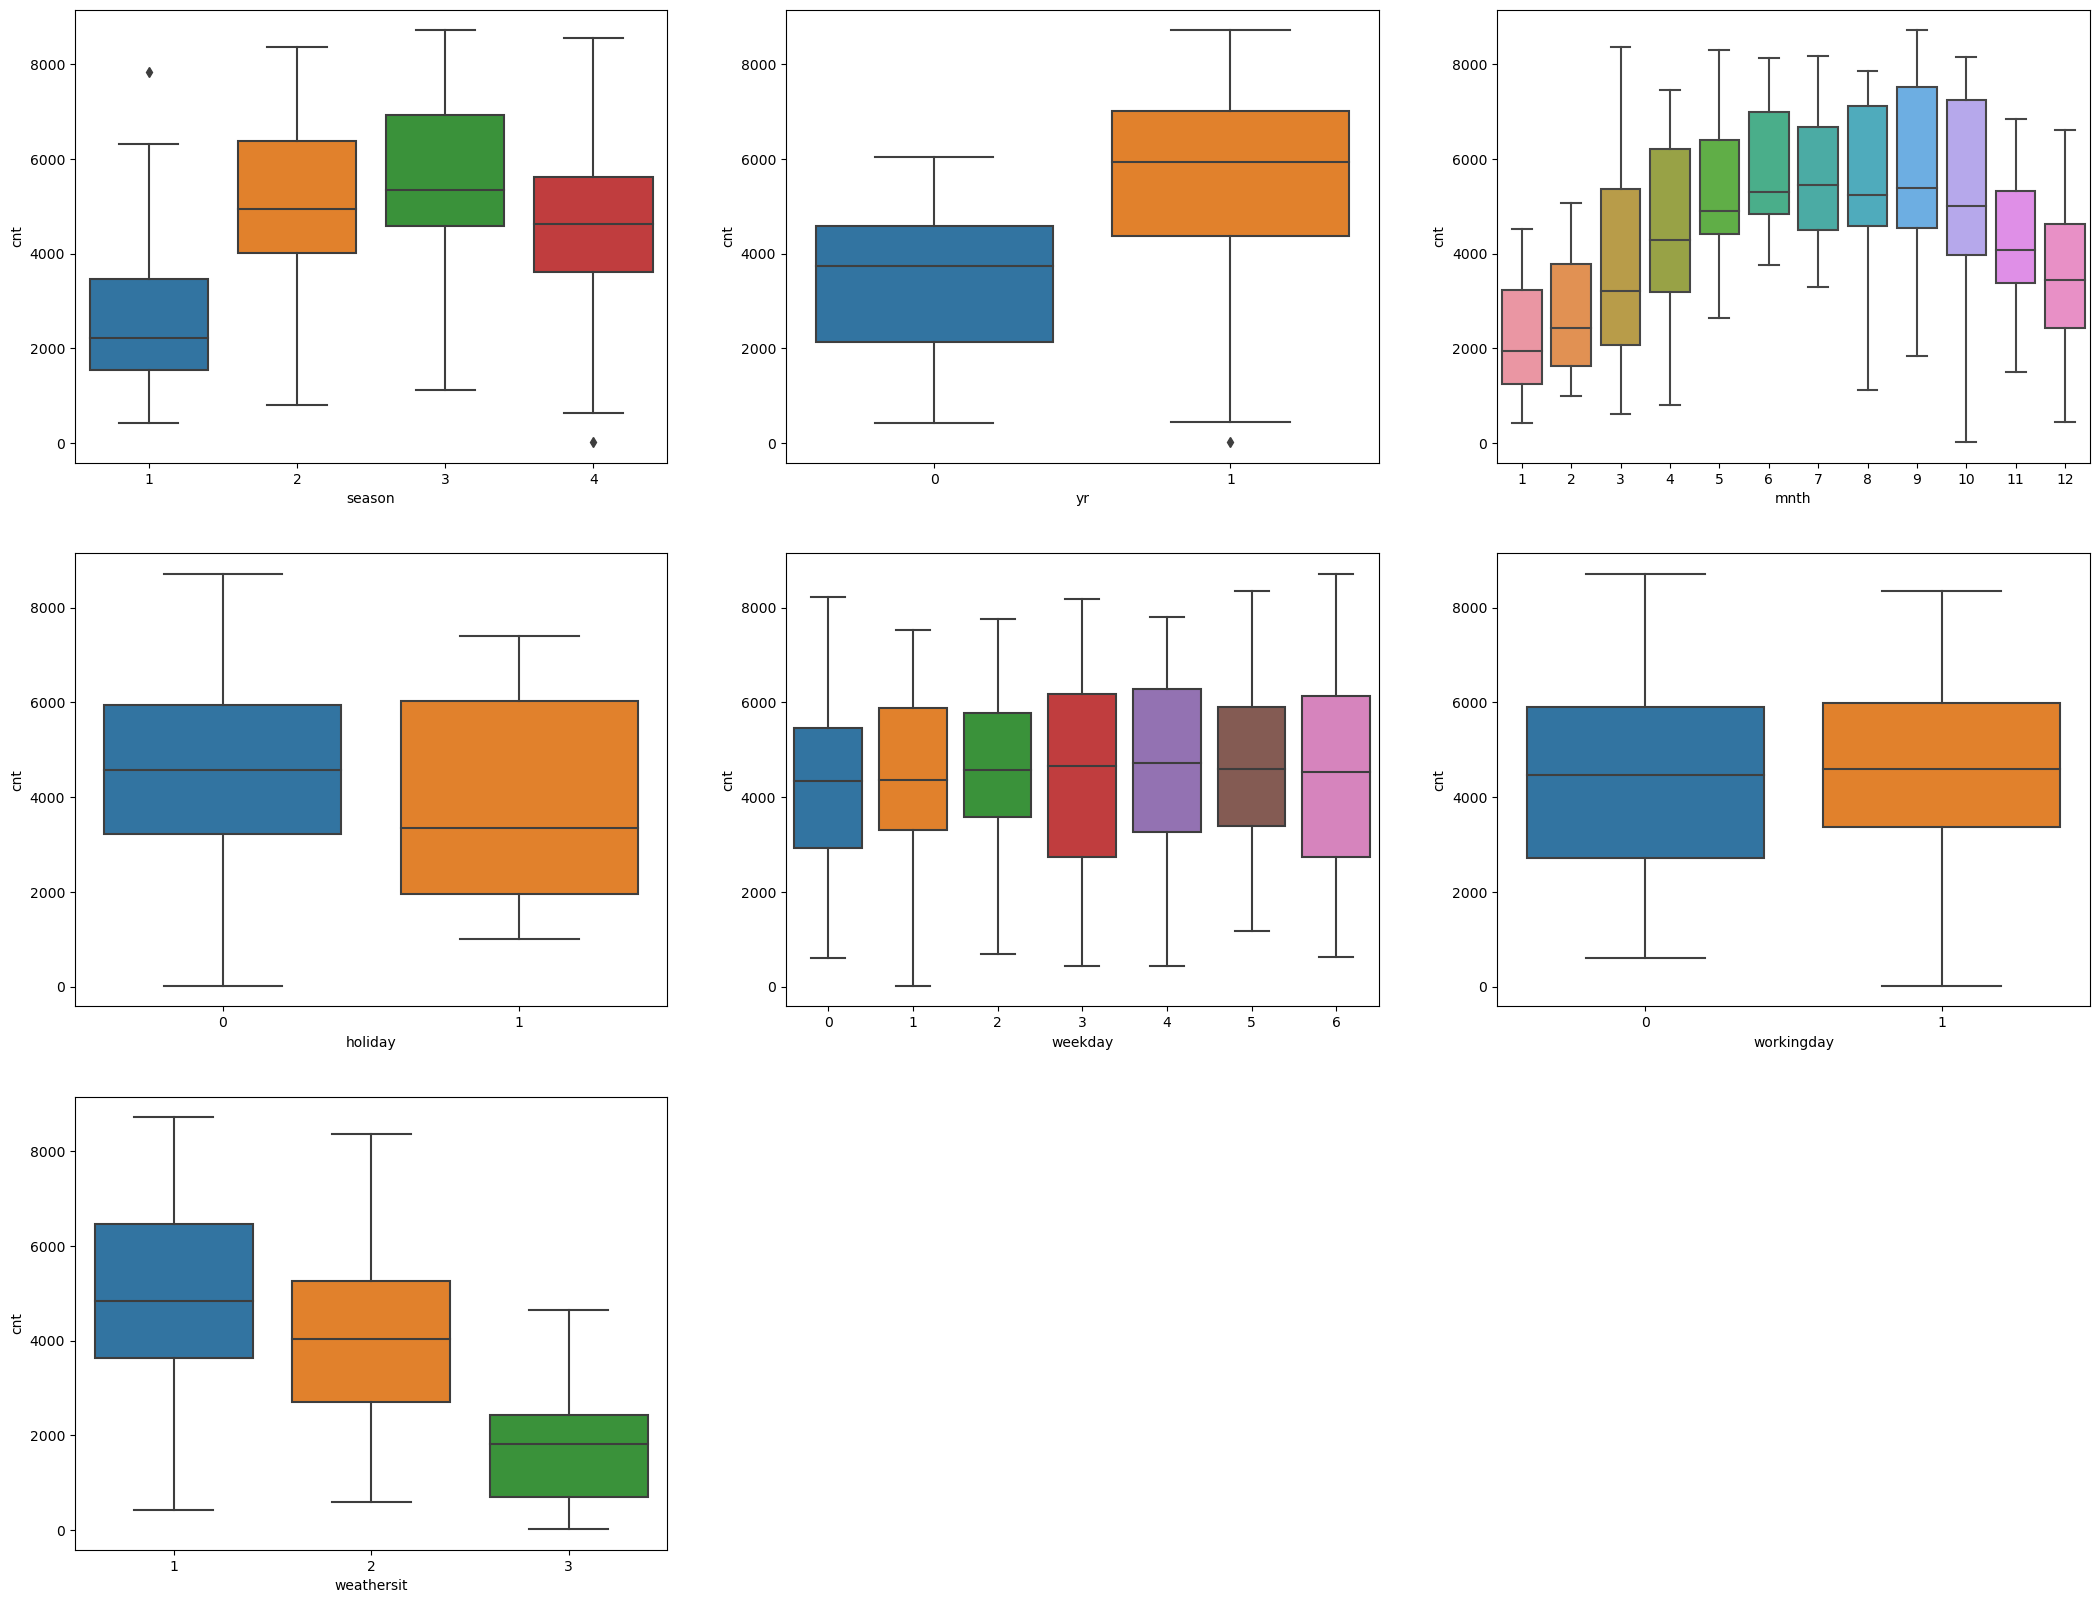

In [561]:
plt.figure(figsize=(26, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeshare_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeshare_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeshare_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeshare_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeshare_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeshare_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeshare_df)
plt.show()

#### Observation:


- For the variable season, we can clearly see that the category 3(Fall)has the highest median which shows that the demand was high during this season. It is least for 1: spring.
- The year 2019 had a higher count of users as compared to the year 2018.
- The count is highest in the month of September.
- The count of users is less during the holiday.
- The bike demand is almost constant throughout the week.
- The count of total users is high during `clear` weather.



### Data Preparation

#### Mapping the categorical values to their respective categorical string values (reference data dictionary)

In [562]:
bikeshare_df['mnth'] = bikeshare_df['mnth'].apply(lambda x: calendar.month_abbr[x])
bikeshare_df['mnth'].head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: mnth, dtype: object

In [563]:
# Maping seasons
bikeshare_df.season = bikeshare_df.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [564]:
# Mapping weathersit
bikeshare_df.weathersit = bikeshare_df.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [565]:
#Mapping Weekday
bikeshare_df.weekday = bikeshare_df.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [566]:
# Check the dataframe now
bikeshare_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating Dummy Variables

The variables `season`,`mnth`, `weekday`, `weathersit` have various levels

- `season` has 4 levels
- `mnth` has 12 levels
- `weekday` has 7 levels
- `weathersit` has 3 levels

We will create DUMMY variables for these four categorical variables namely - `season`, `mnth`, `weekday` & `weathersit`.

In [567]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable 'dummy_df'
dummy_df = bikeshare_df[['season','mnth','weekday','weathersit']]

In [568]:
dummy_df = pd.get_dummies(dummy_df, drop_first=True).astype(int)

In [569]:
# Adding the dummy variables to the original dataset
bikeshare_df = pd.concat([dummy_df, bikeshare_df], axis = 1)

In [570]:
# Checking the dataframe
bikeshare_df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [571]:
#Deleting the orginal columns season.weathersit,weekday,mnth
bikeshare_df.drop(['season'],axis=1, inplace=True)
bikeshare_df.drop(['weathersit'],axis=1, inplace=True)
bikeshare_df.drop(['weekday'],axis=1, inplace=True)
bikeshare_df.drop(['mnth'],axis=1, inplace=True)

bikeshare_df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [572]:
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    int64  
 1   season_Summer                 730 non-null    int64  
 2   season_Winter                 730 non-null    int64  
 3   mnth_Aug                      730 non-null    int64  
 4   mnth_Dec                      730 non-null    int64  
 5   mnth_Feb                      730 non-null    int64  
 6   mnth_Jan                      730 non-null    int64  
 7   mnth_Jul                      730 non-null    int64  
 8   mnth_Jun                      730 non-null    int64  
 9   mnth_Mar                      730 non-null    int64  
 10  mnth_May                      730 non-null    int64  
 11  mnth_Nov                      730 non-null    int64  
 12  mnth_Oct                      730 non-null    int64  
 13  mnth_

## Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [573]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeshare_df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [574]:
from sklearn.preprocessing import MinMaxScaler

In [575]:
scaler = MinMaxScaler()

In [576]:
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,19.201653,23.0423,55.8333,12.208807,7534
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,15.443347,18.8752,48.9583,8.708325,4220


In [577]:
# scale all the numerical columns except the 'dummy' variables.
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [578]:
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [579]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


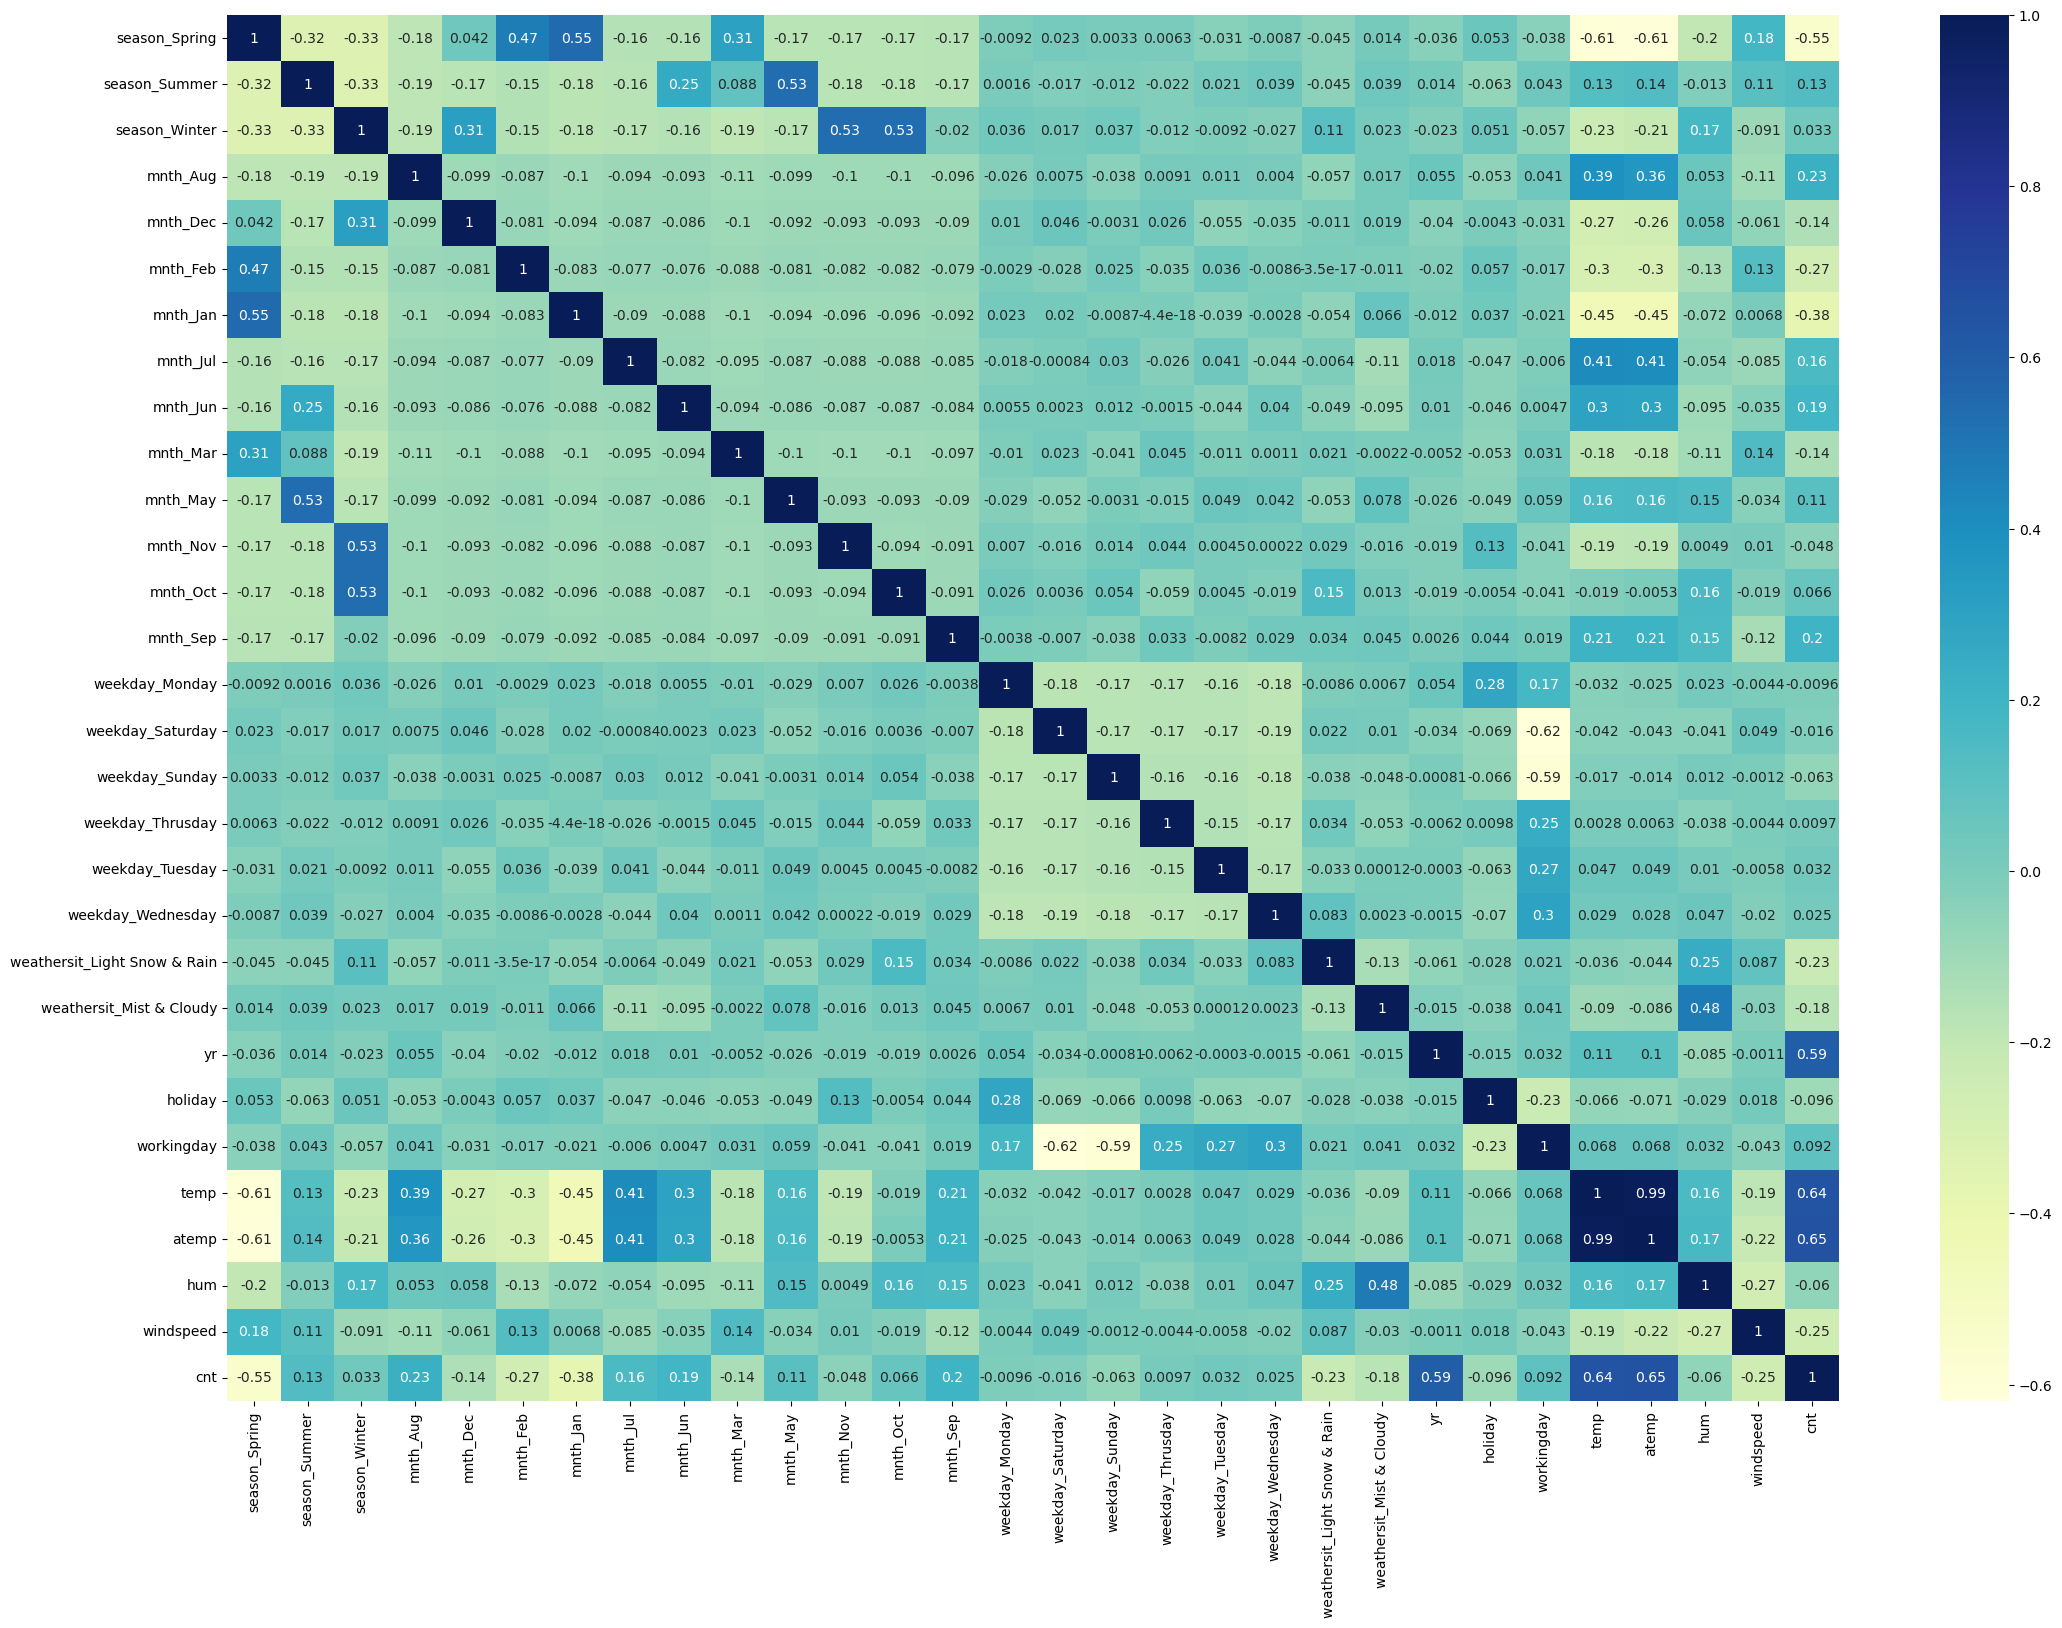

In [580]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (26, 18))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observation:
From the map, it's apparent that 'yr', 'temp' and 'atemp' are correlated with the target variable 'cnt'. Since not much can be said about the other independent variables, we will build a model using all the columns.

### Dividing into X and Y sets for the model building

In [581]:
y_train = df_train.pop('cnt')
X_train = df_train

In [582]:
X_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475


## Building model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE which is a utility from sklearn

### RFE
Recursive feature elimination

In [583]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# rfe = RFE(lm, 10) # running RFE
rfe = RFE(estimator=lm, n_features_to_select=15)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [584]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 15),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

## Building a linear model

Fit a regression line through the training data using `statsmodels`. When using `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [585]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [586]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

In [587]:
X_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475


### Building model using statsmodel for the detailed statistics

In [588]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Adding a constant variable 
For statsmodels, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, statsmodels fits a regression line passing through the origin by default.

In [589]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [590]:
X_train_rfe.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jul,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
653,1.0,0,0,1,0,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,1,0,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,1,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,1,0,0,1,1,0,0,0.395666,0.504508,0.188475


In [591]:
# lr = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [592]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.13e-191
Time:                        10:45:36   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Checking VIF to detect multicollinearity 

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [593]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weekday_Saturday,inf
7,weekday_Sunday,inf
11,holiday,inf
12,workingday,inf
1,season_Spring,5.02
13,temp,3.62
3,season_Winter,3.49
2,season_Summer,2.61
14,hum,1.91
9,weathersit_Mist & Cloudy,1.57


Since holiday has high p-value `0.373` and VIF 'inf'. Hence removing it. 

In [594]:
X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)

#### Rebuilding the model

In [595]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [596]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.13e-191
Time:                        10:45:36   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [597]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,114.08
11,workingday,9.07
6,weekday_Saturday,6.06
7,weekday_Sunday,5.74
1,season_Spring,5.02
12,temp,3.62
3,season_Winter,3.49
2,season_Summer,2.61
13,hum,1.91
9,weathersit_Mist & Cloudy,1.57


Since const has '114.08', we remove it

In [598]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

#### Rebuilding the model

In [599]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [600]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.13e-191
Time:                        10:45:36   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [601]:
# Calculate the VIFs again for the new model
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,32.14
11,temp,18.98
10,workingday,18.41
5,weekday_Saturday,4.91
13,windspeed,4.90
0,season_Spring,4.80
6,weekday_Sunday,4.76
2,season_Winter,3.71
1,season_Summer,3.03
8,weathersit_Mist & Cloudy,2.31


Since 'hum' has '32.14', we remove it

In [602]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [603]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.13e-191
Time:                        10:45:36   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [604]:
# Calculate the VIFs again for the new model
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,16.19
11,temp,12.73
12,windspeed,4.75
5,weekday_Saturday,4.45
6,weekday_Sunday,4.21
0,season_Spring,3.82
2,season_Winter,2.80
1,season_Summer,2.75
9,yr,2.07
3,mnth_Jul,1.60


In [605]:
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

### Preparing the final model

In [606]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [607]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.01e-186
Time:                        10:45:36   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [608]:
# Calculate the VIFs again for the new model
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.17
11,windspeed,4.62
1,season_Summer,2.23
0,season_Spring,2.11
9,yr,2.07
2,season_Winter,1.82
3,mnth_Jul,1.59
8,weathersit_Mist & Cloudy,1.55
4,mnth_Sep,1.33
5,weekday_Saturday,1.22


#### <font color = 'blue'> Conclusion: </font> 

Here we can see all the columns have **VIF** value less than 5 except the `temp` which has a **VIF** value slightly more than **5** that can be ignored. 

Hence, we finalise `lr` as the final model to proceed with the future prdeictions.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [609]:
y_train_cnt = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

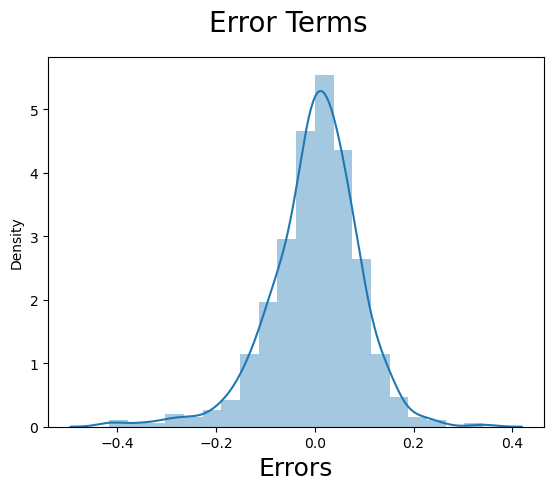

In [610]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

#### <font color = 'blue'> Conclusion: </font>

We can observe that the error terms are concentrated around zero and exhibit a normal distribution. This aligns with the assumptions of linear regression.

### Cross-verifying with qq-plot:

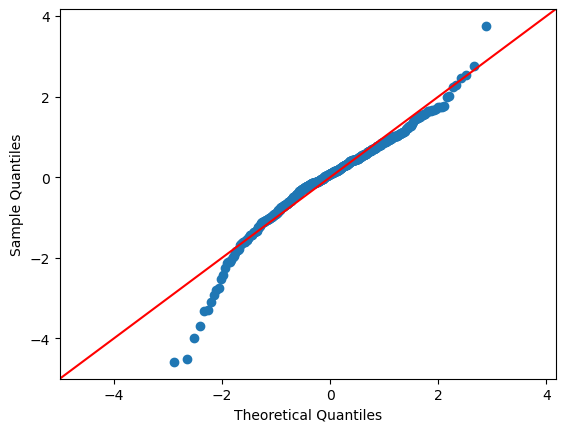

In [611]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

#### <font color = 'blue'> Conclusion: </font>

Here we can see that most of the data points lie on the straight line which indicates that the error terms are normally distributed.

## Making Predictions Using the Final Model

Now we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

#### Applying the scaling on the test sets

In [612]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [613]:
df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [614]:
y_test = df_test.pop('cnt')
X_test = df_test

In [615]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

#### Predicting using values used by the final model

In [616]:
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    int64  
 2   season_Summer                 219 non-null    int64  
 3   season_Winter                 219 non-null    int64  
 4   mnth_Jul                      219 non-null    int64  
 5   mnth_Sep                      219 non-null    int64  
 6   weekday_Saturday              219 non-null    int64  
 7   weekday_Sunday                219 non-null    int64  
 8   weathersit_Light Snow & Rain  219 non-null    int64  
 9   weathersit_Mist & Cloudy      219 non-null    int64  
 10  yr                            219 non-null    int64  
 11  temp                          219 non-null    float64
 12  windspeed                     219 non-null    float64
dtypes: float6

In [617]:
# Making predictions using the final model

y_pred = lr.predict(X_test)

#### Calculating the r-squared

The R-squared statistic is used to assess how well a linear regression model fits the data. It represents the proportion of the variance in the dependent variable that is explained by the independent variables together. R-squared quantifies the extent of the relationship between your model and the dependent variable, expressed as a percentage on a scale from 0 to 100%.

In [618]:
r2_score(y_test, y_pred)

0.8058142386351405

#### <font color = 'blue'> Conclusion: </font>

We can see that the `r_squared on the test set is 0.805` and the `r-squared on the trained set 0.837` which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

## Model Evaluation

Plotting the graph for actual versus predicted values.

#### Plotting y_test and y_pred to understand the spread

Text(0, 0.5, 'y_pred')

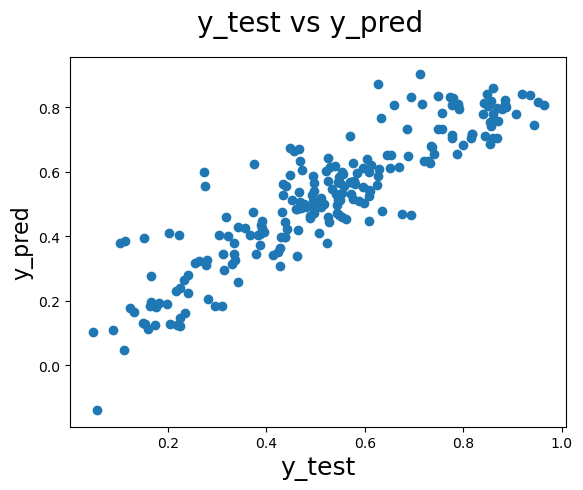

In [619]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) # Plot heading 
plt.xlabel('y_test', fontsize = 18) # X-label
plt.ylabel('y_pred', fontsize = 16)

#### <font color = 'blue'> Conclusion: </font>
We can infer that the final model's fit is not random and has reasonably good predictive power.

#### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [620]:
param = pd.DataFrame(lr.params)
param.insert(0, 'Variables', param.index)
param.rename(columns = {0:'Coefficient value'}, inplace = True)
param['index'] = list(range(0, 13))
param.set_index('index', inplace = True)
param.sort_values(by = 'Coefficient value', ascending = False, inplace = True)
param

,Variables,Coefficient value
index,,
11,temp,0.493363
10,yr,0.234126
0,const,0.200531
3,season_Winter,0.082950
5,mnth_Sep,0.072144
2,season_Summer,0.046884
6,weekday_Saturday,0.015705
7,weekday_Sunday,-0.042224
4,mnth_Jul,-0.049155


### <font color = 'blue'> Final Conclusions : </font>
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

$ cnt = 0.2005 + 0.4933 \times  temp + 0.2341  \times  yr + 0.0829 \times season Winter + 0.0721 \times mnth Sept + 0.0468 \times season Summer + 0.0157 \times weekday Saturday - 0.0422 \times weekday Sunday - 0.0491 \times mnth Jul - 0.067 \times season Spring - 0.0816 \times weathersit Mist Cloudy - 0.1513 \times windspeed - 0.2857 \times weathersit Light Snow Rain $

#### All the positive coefficients such temp, mnthSept, seasonWinter and seasonSummer indicate that an increase in these values will lead to an increase in the value of cnt.
#### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain almost 81% of bike demand.
- Coeffiencients of the variables explain the factors effecting the bike demand

Based on final model top three features contributing significantly towards explaining the demand are:

 - Temperature (0.4933)
 - weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.2857)
 - year (0.2341)

Hence, it can be clearly concluded that the variables `temperature` , `season`/ `weather situation` and `month`  are significant in predicting the demand for shared bikes.